In [1]:
# import libraries

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
# Load the dataset

data = pd.read_csv(r"C:\Users\HARSHIT VARTAK\Downloads\Mall_Customers (1).csv")
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
# Adjust the column names based on your dataset

interest_columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [4]:
# Extract the features for clustering

features = data[interest_columns]

In [5]:
# Standardize the features to have zero mean and unit variance

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [6]:
# Determine the optimal number of clusters using the Elbow method

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

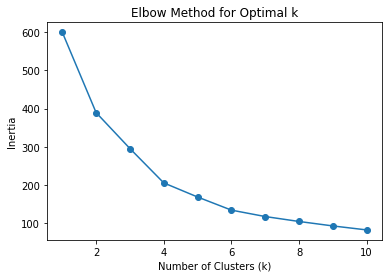

In [7]:
# Plot the Elbow method to identify the optimal number of clusters

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [8]:
# Based on the Elbow method, choose the optimal number of clusters

optimal_k = 3  # Adjust this based on your plot

In [9]:
# Apply k-means clustering with the chosen number of clusters

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['cluster'] = kmeans.fit_predict(features_scaled)

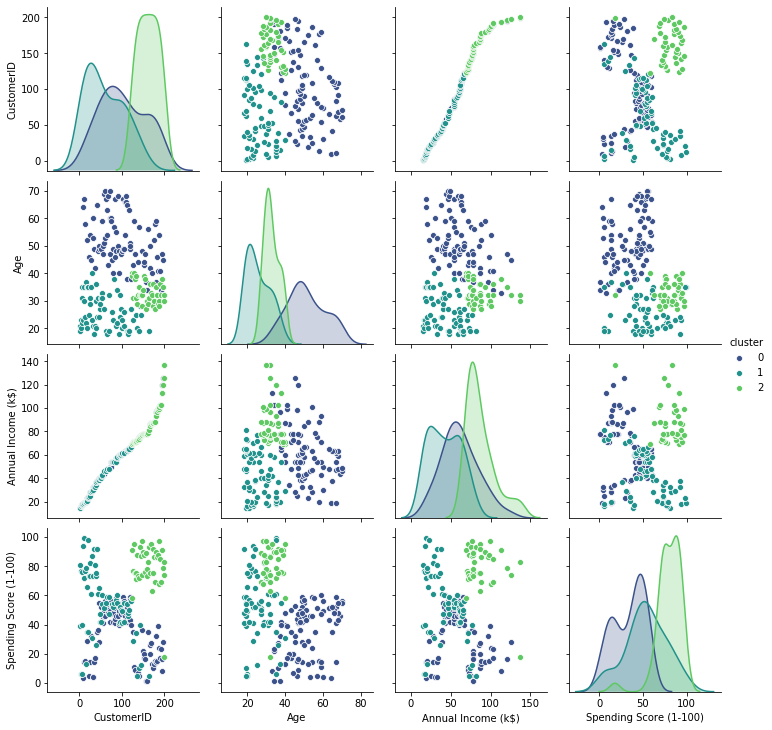

In [10]:
# Visualize the clusters using a pairplot (assuming 3 clusters)

sns.pairplot(data, hue='cluster', palette='viridis', diag_kind='kde')
plt.show()